# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.148120e+01     7.976782e+00
 * time: 0.0021741390228271484
     1     2.860931e+01     4.834721e+00
 * time: 0.006232023239135742
     2     1.878532e+01     4.231944e+00
 * time: 0.010436058044433594
     3     1.305985e+01     3.290575e+00
 * time: 0.014642000198364258
     4     1.154349e+01     3.492442e+00
 * time: 0.018026113510131836
     5     1.133521e+01     3.110641e+00
 * time: 0.021433115005493164
     6     9.973911e+00     1.461407e+00
 * time: 0.025832176208496094
     7     8.825201e+00     1.696388e+00
 * time: 0.029942035675048828
     8     8.340630e+00     1.257247e+00
 * time: 0.0341341495513916
     9     8.188388e+00     7.369264e-01
 * time: 0.08735418319702148
    10     8.181798e+00     1.369906e+00
 * time: 0.08998298645019531
    11     8.143823e+00     1.008025e+00
 * time: 0.09273409843444824
    12     8.070573e+00     5.562346e-01
 * time: 0.09541201591491699
    13     8.019478e+00     5.871768e-01


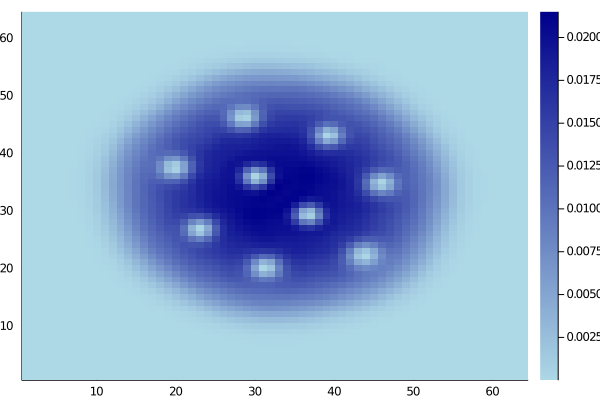

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)